In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from sympy import *
from matplotlib import pyplot as plt
from scipy import special as sp
from scipy import integrate
pdf = PdfPages('figure_2.pdf')
plt.figure(figsize=(15,5))

#ax.set_xlabel(fontsize=30)

#ax.set_ylabel(fontsize=30)

plt.subplot(121)
x = np.logspace(np.log10(0.005),np.log10(20),100) #distance to center
rb=4.9
gamma_0=1.42
alpha=10
beta=3.5
n=3354
#n_core = n*2**(beta/alpha-gamma_0/alpha)*(x/rb)**(-gamma_0)*(1+(x/rb)**alpha)**(gamma_0/alpha-beta/alpha)
R_e=x**(1/2)*2.73*10**15 # Einstein Radius in cm
def density(t):
    return n*2**(beta/alpha-gamma_0/alpha)*(t/rb)**(-gamma_0)*(1+(t/rb)**alpha)**(gamma_0/alpha-beta/alpha) #nuker model
def sigma_kernel(t,R):
    return density(t)*t/np.sqrt(t**2-R**2)
n_core=density(x)
sigma_core=[]
for i in x:
    sigma_core.append(2*integrate.quad(sigma_kernel, i, float("inf"), args=i)[0])
plt.plot(x, n_core, color="black")
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("r [pc]",fontsize=15) 
plt.ylabel("3D Number Density"" [$pc^{-3}$]",fontsize=15)

plt.subplot(122)
plt.plot(x, sigma_core,color="black")
plt.plot(x, 215000*x**(-0.42),color="black",ls="--")
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("r [pc]",fontsize=15) 
plt.ylabel("Projected Surface Number density [$pc^{-2}$]",fontsize=15)
pdf.savefig()   
plt.close()
pdf.close() #produce figure 1

In [2]:
pdf = PdfPages('figure_3x.pdf')
plt.figure(figsize=(15,5))
plt.subplot(121)
def sig(x,a,b,c):
    return (a**2+b**2*(x)**(c))**0.5
poptb=np.array([59.19475207, 58.45055745, -0.79986067])
poptl=np.array([97.67999821, 25.46707636, -1.34822337])
plt.plot(x,sig(x,*poptb),label="$\sigma_b$", ls="--")
plt.plot(x,sig(x,*poptl),label="$\sigma_l$", ls="--")
dispersion=(sig(x,*poptl)**2+sig(x,*poptb)**2)**(0.5)
plt.plot(x,dispersion,label="$\sigma$")
plt.plot(x, (55**2+103**2*(x/0.39)**(-1.2))**(1/2), label="Alexander & Sternberg 1999", color="black", ls="--")
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("r [pc]",fontsize=15)
plt.ylabel("$\sigma$[km/s]",fontsize=15)
plt.legend()

#plt.yscale("log") 
plt.subplot(122)
v=53.7+17.9*np.log10(x)
vprime=80+20*np.log10(x)
plt.errorbar(x,v, color="black",label="$v_{rot}$")
plt.errorbar(x,v, yerr=dispersion, ls="--")
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("r [pc]",fontsize=15)
plt.ylabel("$v_{rot}$[km/s]",fontsize=15)
plt.legend()
pdf.savefig()   
plt.close()
pdf.close() #produce figure 2

In [3]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from sympy import *
from matplotlib import pyplot as plt
from scipy import special as sp
pdf = PdfPages('figure_1.pdf')
my_matrix = np.loadtxt(open("KLF.csv","rb"),delimiter=",",skiprows=0)
my_matrix=my_matrix.T
M=my_matrix[0]
fr=my_matrix[1]/np.sum(my_matrix[1])
fr=np.array(fr)
plt.plot(M,fr,color="black") # this is to reproduce figure 2, though in practice I do not know if the paper used a distribution over binned magnitude or one over continuous luminosity
plt.xlabel("K_s[mag]") 
plt.ylabel("Fraction in Population per bin")
plt.yscale("log")
pdf.savefig()   
plt.close()
pdf.close() #produce figure 3

In [51]:
colors=["k","r","b","y","g"]
from scipy import integrate
pdf = PdfPages('figure4_test.pdf')
plt.figure(figsize=(15,5))
plt.subplot(121)
dispersion=np.array(dispersion)
tslice=100
def f2(x, vm, vr):
    return (0.5*x*(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
def W(vm, vr): 
    w, err = integrate.quad(f2,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
def f1(x, vm, vr):
    return (x**2*np.sqrt(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
def G(vm, vr): #correspond to eqn (A5)
    w, err = integrate.quad(f1,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
#def f2(x, vm, vr):
    #return (x*(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
#def G2(vm, vr): 
    #w, err = integrate.quad(f2,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    #return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
Gammaprimefaintun=np.zeros((5,tslice)) #un means unresolved
Gammaprimebrightun=np.zeros((5,tslice)) #un means unresolved
DeltaKfaintun=np.zeros((5,tslice)) #un means unresolved
DeltaKbrightun=np.zeros((5,tslice)) #un means unresolved
deltat=np.logspace(-2,1,tslice) #the observation time
dGamma=np.zeros(100)
dGammalong=np.zeros(100)
for g in [17, 18,19,20,21]: #For different thresholds
    K_0=g
    A=np.zeros(49)
    #A_k=0.14 #extinction coefficient, already corrected
    #ubar=(beta-1)/(2-beta)*(L_l/L_0)**(beta-1) #eqn(23), we didn't use this one
    #n=(rho_bd+rho_core)*0.2 #eqn(20),stellar number density 0.2 given on page 143, we use new data to calculate a new one
    t=0
    for o in range(49):    
        A[o]=max(10**(-0.4*(K_0-M[o])),1.34) #A_s given by eqn(6)
        if (M[o]<K_0):
            t+=fr[o] #fraction of stars directly above threshold
    u0= np.sqrt(2*A/(np.sqrt(A**2-1))-2) 
    S0=sigma_core[28]*t*0.039**2
    dmu=((S0**(-1/2)/(np.pi**(1/2)))/0.0145)**2 #the boundary for resolved microlensing
    for k in range(0,tslice):
        Gr=float(0)
        Wr=float(0)
        vmax=np.zeros((100,49))
        a = 0
        for i in range(0,100):
            if (x[i]>dmu): # this is unresolved lensing
                break
            Gs=float(0)
            Ws=float(0)
            dr=x[i]*(1.042-1/1.042) #integration step (approximately) of distance
            for j in range(0,49): #integration over magnitude, bin 1 mag
                if (u0[j]>1.00):
                    u0[j]=0
                vmax[i][j]=2*u0[j]*R_e[i]*0.00001/((86400*365.25)*deltat[k]) if(u0[j]!=0) else 0
                Gs+=G(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25#eqn(A4)
                Ws+=W(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25
            ubar=np.sum(u0*fr*0.25)
            Gr+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs #integrate over distance x logarithmically, correspond to eqn (A4)
            Wr+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs*Ws
        Gammaprimefaintun[g-17][k]=float(Gr) #record the integration output
        DeltaKfaintun[g-17][k]=ubar/(float(Wr)/Gammaprimefaintun[g-17][k])
        print(k/tslice+g)
for i in [0,1,2,3,4]: 
    plt.plot(deltat,Gammaprimefaintun[i]*(3.3*10**(-25)), label=str(i+17), color=colors[i]) #constant given by unit transformation

    
for g in [17,18,19,20,21]: #For different thresholds
    K_0=g
    A=np.zeros(49)
    t=0
    for o in range(49):
        A[o]=max(10**(-0.4*(K_0-M[o])),1.34) #A_s given by eqn(6)
        if (M[o]<K_0):
            t+=fr[o] #fraction of stars directly above threshold
    u0= np.sqrt(2*A/(np.sqrt(A**2-1))-2) 
    S0=sigma_core[28]*t*0.039**2
    dmu=((S0**(-1/2)/(np.pi**(1/2)))/0.0145)**2
    for k in range(0,tslice):
        Gr=float(0)
        Wr=float(0)
        vmax=np.zeros((100,49))
        a = 0
        for i in range(0,100):
            Gs=float(0)
            Ws=float(0)
            dr=x[i]*(1.042-1/1.042) #integration step (approximately) of distance
            if (x[i]>dmu):
                break
            for j in range(0,49): #integration over magnitude, bin 1 mag
                if (u0[j]<1.00):
                    u0[j]=0
                vmax[i][j]=2*u0[j]*R_e[i]*0.00001/((86400*365.25)*deltat[k]) if(u0[j]!=0) else 0
                Gs+=G(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25#eqn(A4)
                Ws+=W(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25
            ubar=np.sum(u0*fr*0.25)
            Gr+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs #integrate over distance x logarithmically, correspond to eqn (A4)
            Wr+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs*Ws
        Gammaprimebrightun[g-17][k]=float(Gr) #record the integration output
        DeltaKbrightun[g-17][k]=ubar/(float(Wr)/Gammaprimebrightun[g-17][k])
        print(k/tslice+g)
for i in [0,1,2,3,4]:
    plt.plot(deltat,Gammaprimebrightun[i]*(3.3*10**(-25)), ls='--', color=colors[i]) #constant given by unit transformation
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("long event cumulative rate $\Gamma(t>\Delta T) [yr^{-1}]$",fontsize=15)
plt.xlabel("$\Delta T [yr]$",fontsize=15)
plt.legend()

plt.subplot(122)
for i in [0,1,2,3,4]: 
    plt.plot(deltat,np.log10(DeltaKfaintun[i])*2.5, label=str(i+17),color=colors[i]) #constant given by unit transformation
for i in [0,1,2,3,4]: 
    plt.plot(deltat,np.log10(DeltaKbrightun[i])*2.5, ls='--', color=colors[i]) #constant given by unit transformation
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel(r"median amplification $\Delta K_{long} [mag]$",fontsize=15)
plt.xlabel("$\Delta T [yr]$",fontsize=15)
plt.legend()
pdf.savefig()   
plt.close()
pdf.close()# figure 4

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


17.0
17.01
17.02
17.03
17.04
17.05
17.06
17.07
17.08
17.09
17.1
17.11
17.12
17.13
17.14
17.15
17.16
17.17
17.18
17.19
17.2
17.21
17.22
17.23
17.24
17.25
17.26
17.27
17.28
17.29
17.3
17.31
17.32
17.33
17.34
17.35
17.36
17.37
17.38
17.39
17.4
17.41
17.42
17.43
17.44
17.45
17.46
17.47
17.48
17.49
17.5
17.51
17.52
17.53
17.54
17.55
17.56
17.57
17.58
17.59
17.6
17.61
17.62
17.63
17.64
17.65
17.66
17.67
17.68
17.69
17.7
17.71
17.72
17.73
17.74
17.75
17.76
17.77
17.78
17.79
17.8
17.81
17.82
17.83
17.84
17.85
17.86
17.87
17.88
17.89
17.9
17.91
17.92
17.93
17.94
17.95
17.96
17.97
17.98
17.99
18.0
18.01
18.02
18.03
18.04
18.05
18.06
18.07
18.08
18.09
18.1
18.11
18.12
18.13
18.14
18.15
18.16
18.17
18.18
18.19
18.2
18.21
18.22
18.23
18.24
18.25
18.26
18.27
18.28
18.29
18.3
18.31
18.32
18.33
18.34
18.35
18.36
18.37
18.38
18.39
18.4
18.41
18.42
18.43
18.44
18.45
18.46
18.47
18.48
18.49
18.5
18.51
18.52
18.53
18.54
18.55
18.56
18.57
18.58
18.59
18.6
18.61
18.62
18.63
18.64
18.65
18.66
18.67
18.68
18.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


20.0
20.01
20.02
20.03
20.04
20.05
20.06
20.07
20.08
20.09
20.1
20.11
20.12
20.13
20.14
20.15
20.16
20.17
20.18
20.19
20.2
20.21
20.22
20.23
20.24
20.25
20.26
20.27
20.28
20.29
20.3
20.31
20.32
20.33
20.34
20.35
20.36
20.37
20.38
20.39
20.4
20.41
20.42
20.43
20.44
20.45
20.46
20.47
20.48
20.49
20.5
20.51
20.52
20.53
20.54
20.55
20.56
20.57
20.58
20.59
20.6
20.61
20.62
20.63
20.64
20.65
20.66
20.67
20.68
20.69
20.7
20.71
20.72
20.73
20.74
20.75
20.76
20.77
20.78
20.79
20.8
20.81
20.82
20.83
20.84
20.85
20.86
20.87
20.88
20.89
20.9
20.91
20.92
20.93
20.94
20.95
20.96
20.97
20.98
20.99
21.0
21.01
21.02
21.03
21.04
21.05
21.06
21.07
21.08
21.09
21.1
21.11
21.12
21.13
21.14
21.15
21.16
21.17
21.18
21.19
21.2
21.21
21.22
21.23
21.24
21.25
21.26
21.27
21.28
21.29
21.3
21.31
21.32
21.33
21.34
21.35
21.36
21.37
21.38
21.39
21.4
21.41
21.42
21.43
21.44
21.45
21.46
21.47
21.48
21.49
21.5
21.51
21.52
21.53
21.54
21.55
21.56
21.57
21.58
21.59
21.6
21.61
21.62
21.63
21.64
21.65
21.66
21.67
21.68
21.

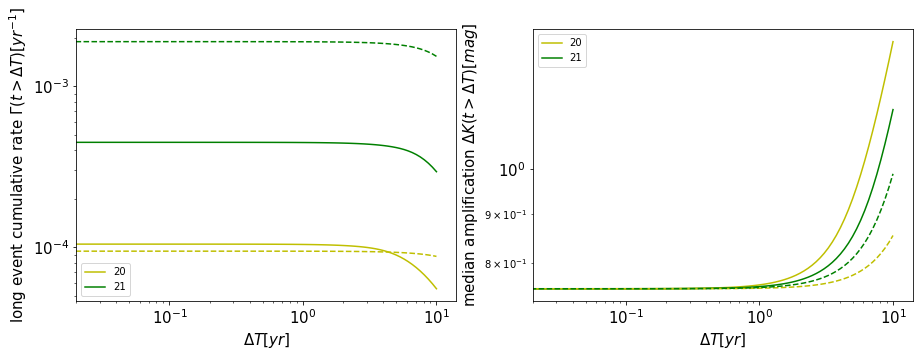

In [12]:
colors=["y","g"]
dispersion=np.array(dispersion)
tslice=100
from scipy import integrate
pdf = PdfPages('figure_5.pdf')
plt.figure(figsize=(15,5))
plt.subplot(121)
dispersion=np.array(dispersion)
def f2(x, vm, vr):
    return (0.5*x*(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
def W(vm, vr): 
    w, err = integrate.quad(f2,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
def f1(x, vm, vr):
    return (x**2*np.sqrt(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
def G(vm, vr): #correspond to eqn (A5)
    w, err = integrate.quad(f1,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
#def f2(x, vm, vr):
    #return (x*(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
#def G2(vm, vr): 
    #w, err = integrate.quad(f2,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    #return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
Gammaprimefaint=np.zeros((2,tslice)) #resolved
Gammaprimebright=np.zeros((2,tslice)) #resolved
DeltaKfaint=np.zeros((2,tslice)) 
DeltaKbright=np.zeros((2,tslice)) 
deltat=np.logspace(-2,1,tslice) #the observation time

for g in [20,21]: #For different thresholds
    K_0=g
    A=np.zeros(49)
    #A_k=0.14 #extinction coefficient, already corrected
    #ubar=(beta-1)/(2-beta)*(L_l/L_0)**(beta-1) #eqn(23), we didn't use this one
    #n=(rho_bd+rho_core)*0.2 #eqn(20),stellar number density 0.2 given on page 143, we use new data to calculate a new one
    t=0
    for o in range(49):    
        A[o]=max(10**(-0.4*(K_0-M[o])),1.34) #A_s given by eqn(6)
        if (M[o]<K_0):
            t+=fr[o] #fraction of stars directly above threshold
    u0= np.sqrt(2*A/(np.sqrt(A**2-1))-2) 
    S0=sigma_core[28]*t*0.039**2
    dmu=((S0**(-1/2)/(np.pi**(1/2)))/0.0145)**2 #the boundary for resolved microlensing
    for k in range(0,tslice):
        Gr=float(0)
        Wr=float(0)
        vmax=np.zeros((100,49))
        a = 0
        for i in range(0,100):
            dr=x[i]*(1.042-1/1.042) #integration step (approximately) of distance
            Gs=float(0)
            Ws=float(0)
            for j in range(0,49):
                if(x[i]>dmu):                        #integration over magnitude, bin 1 mag
                    if (u0[j]>1.00):
                        u0[j]=0
                    vmax[i][j]=2*u0[j]*R_e[i]*0.00001/((86400*365.25)*deltat[k]) if(u0[j]!=0) else 0
                    Gs+=G(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25#eqn(A4)
                    Ws+=W(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25
            ubar=np.sum(u0*fr*0.25)
            Gr+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs #integrate over distance x logarithmically, correspond to eqn (A4)
            Wr+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs*Ws
        Gammaprimefaint[g-20][k]=float(Gr) #record the integration output
        DeltaKfaint[g-20][k]=ubar/(float(Wr)/Gammaprimefaint[g-20][k])
for i in [0,1]: 
    plt.plot(deltat,Gammaprimefaint[i]*(3.3*10**(-25)), label=str(i+20), color=colors[i]) #constant given by unit transformation

    
for g in [20,21]: #For different thresholds
    K_0=g
    A=np.zeros(49)
    t=0
    for o in range(49):
        A[o]=max(10**(-0.4*(K_0-M[o])),1.34) #A_s given by eqn(6)
        if (M[o]<K_0):
            t+=fr[o] #fraction of stars directly above threshold
    u0= np.sqrt(2*A/(np.sqrt(A**2-1))-2) 
    S0=sigma_core[28]*t*0.039**2
    dmu=((S0**(-1/2)/(np.pi**(1/2)))/0.0145)**2
    for k in range(0,tslice):
        Gr=float(0)
        Wr=float(0)
        vmax=np.zeros((100,49))
        a = 0
        for i in range(0,100):
            Gs=float(0)
            Ws=float(0)
            dr=x[i]*(1.042-1/1.042) #integration step (approximately) of distance
            for j in range(0,49):
                if(x[i]>dmu):                        #integration over magnitude, bin 0.25 mag
                    if (u0[j]<1.00):
                        u0[j]=0
                    vmax[i][j]=2*u0[j]*R_e[i]*0.00001/((86400*365.25)*deltat[k]) if(u0[j]!=0) else 0
                    Gs+=G(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25#eqn(A4)
                    Ws+=W(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25
            Gr+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs #integrate over distance x logarithmically, correspond to eqn (A4)
            Wr+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs*Ws
            ubar=np.sum(u0*fr*0.25)
        Gammaprimebright[g-20][k]=float(Gr) #record the integration output
        DeltaKbright[g-20][k]=ubar/(float(Wr)/Gammaprimebright[g-20][k])
        print(k/tslice+g)
        
for i in [0,1]: 
    plt.plot(deltat,Gammaprimebright[i]*(3.3*10**(-25)), ls='--', color=colors[i]) #constant given by unit transformation
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("long event cumulative rate $\Gamma(t>\Delta T) [yr^{-1}]$",fontsize=15)
plt.xlabel("$\Delta T [yr]$",fontsize=15)
plt.axis(xmin=0.02)
plt.legend()

plt.subplot(122)
for i in [0,1]: 
    plt.plot(deltat,np.log10(DeltaKfaint[i])*2.5, label=str(i+20),color=colors[i]) #constant given by unit transformation
for i in [0,1]: 
    plt.plot(deltat,np.log10(DeltaKbright[i])*2.5, ls='--', color=colors[i]) #constant given by unit transformation
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel(r"median amplification $\Delta K(t>\Delta T) [mag]$",fontsize=15)
plt.xlabel("$\Delta T [yr]$",fontsize=15)
plt.axis(xmin=0.02)
plt.legend()
pdf.savefig()
#plt.close()
pdf.close()# figure 5

In [ ]:
colors=["k","r","b","y","g"]
from scipy import integrate
pdf = PdfPages('figure6_test.pdf')
plt.figure(figsize=(15,5))
plt.subplot(121)
def f(x, vr):
    return (np.exp(-x**2/2-vr**2/2)*x*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
def G(vm, vr): #correspond to eqn (A5)
    w, err = integrate.quad(f,vm,10,args=(vr)) #a more accurate integration which takes much more time, but the below approximation also works
    #t=np.linspace(0,vm,101)
    #w=0
    #dt=vm/101
    #for i in range(101):
        #w+=f(t[i], vm, vr)*dt
    return w if  (vm!=0) else 0
def arch(x,a,par,vr):
    return np.sqrt(a**2-x**2)*G(np.sqrt(a**2-x**2)*par,vr)
tave=np.zeros((5,tslice))
deltat=np.logspace(-2,1,tslice) #the observation time
for g in [17,18,19,20,21]: #For different thresholds
    K_0=g
    A=np.zeros(49)
    t=0
    #n=(rho_bd+rho_core)*0.2 #eqn(20),stellar number density 0.2 given on page 143, we may use new data to calculate a new one
    for o in range(49): 
        A[o]=max(10**(-0.4*(K_0-M[o])),1.34) #A_s given by eqn(6)
        if (M[o]<K_0):
            t+=fr[o] #fraction of stars directly above threshold
    u0= np.sqrt(2*A/(np.sqrt(A**2-1))-2) 
    S0=sigma_core[28]*t*0.039**2
    dmu=((S0**(-1/2)/(np.pi**(1/2)))/0.0145)**2
    for k in range(0,tslice):
        Gr=float(0)
        vmax=np.zeros((100,49))
        a = 0
        for i in range(0,100): 
            print(i)
            dr=x[i]*(1.042-1/1.042) #integration step (approximately) of distance
            if (x[i]>dmu):
                break
            Gs=float(0)
            for j in range(0,49): #integration over magnitude, bin 1 mag
                i1,i2=integrate.quad(arch,0,u0[j],args=(u0[j],(2*R_e[i]/deltat[k]/(86400*365.25)/100000/dispersion[i]),v[i]/dispersion[i]))
                Gs+=i1*0.25*fr[j]
            Gr+=n_core[i]*dr*4*R_e[i]**2*Gs #integrate over distance x logarithmically, correspond to eqn (A4)
        tave[g-17][k]=float(Gr)/(Gammaprimefaintun[g-17][0]-Gammaprimefaintun[g-17][k]+Gammaprimebrightun[g-17][0]-Gammaprimebrightun[g-17][k]) #record the integration output
        print(k/tslice+g)
        
tavere=np.zeros((2,tslice))
for g in [20,21]: #For different thresholds
    K_0=g
    A=np.zeros(49)
    t=0
    #n=(rho_bd+rho_core)*0.2 #eqn(20),stellar number density 0.2 given on page 143, we may use new data to calculate a new one
    for o in range(49): 
        A[o]=max(10**(-0.4*(K_0-M[o])),1.34) #A_s given by eqn(6)
        if (M[o]<K_0):
            t+=fr[o] #fraction of stars directly above threshold
    u0= np.sqrt(2*A/(np.sqrt(A**2-1))-2) 
    S0=sigma_core[28]*t*0.039**2
    dmu=((S0**(-1/2)/(np.pi**(1/2)))/0.0145)**2
    for k in range(0,tslice):
        Gr=float(0)
        vmax=np.zeros((100,49))
        a = 0
        for i in range(0,100): 
            print(i)
            dr=x[i]*(1.042-1/1.042) #integration step (approximately) of distance
            Gs=float(0)
            for j in range(0,49): #integration over magnitude, bin 1 mag
                if (x[i]>dmu):
                    i1,i2=integrate.quad(arch,0,u0[j],args=(u0[j],(2*R_e[i]/deltat[k]/(86400*365.25)/100000/dispersion[i]),v[i]/dispersion[i]))
                    Gs+=i1*0.25*fr[j]
            Gr+=n_core[i]*dr*4*R_e[i]**2*Gs #integrate over distance x logarithmically, correspond to eqn (A4)
        tavere[g-20][k]=float(Gr)/(Gammaprimefaint[g-20][0]-Gammaprimefaint[g-20][k]+Gammaprimebright[g-20][0]-Gammaprimebright[g-20][k]) #record the integration output
        print(k/tslice+g)
colors=["k","r","b","y","g"]
pdf = PdfPages('figure6_test.pdf')
plt.figure(figsize=(15,5))
plt.subplot(121)
for i in [0,1,2,3,4]: 
    plt.plot(deltat,tave[i]*0.00001/(86400*365.25), label=str(i+17),color=colors[i]) #constant given by unit transformation
plt.plot(deltat,deltat/2,ls='--',color='black')
plt.xscale("log")
plt.yscale("log")
plt.axis(xmin=0.05)
plt.ylabel("Av. short event timescale [yr]")
plt.xlabel("$\Delta T [yr]$")
plt.legend()

plt.subplot(122)
for i in [0,1]: 
    plt.plot(deltat,tavere[i]*0.00001/(86400*365.25), label=str(i+20),color=colors[i+3]) #constant given by unit transformation
plt.plot(deltat,deltat/2,ls='--',color='black')
plt.xscale("log")
plt.yscale("log")
plt.axis(xmin=0.5,ymin=0.05)
plt.ylabel("Av. short event timescale [yr]")
plt.xlabel("$\Delta T [yr]$")
plt.legend()
pdf.savefig()   
plt.close()
pdf.close() #figure6test

In [24]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np #an example to show one such shape
from matplotlib import pyplot as plt
import random
pdf = PdfPages('figure8.pdf')
plt.figure(figsize=(12,5))
plt.subplot(121)
A_th=5 #threshold
a=[]
b=[]
t=0
gamma=1.3
for j in range(1000000):
    x=-3+6*random.random()
    y=-6+12*random.random() #generate position
    coef3=(1-2*gamma)*x/gamma
    coef2=(1-gamma)**2*(x**2+y**2)/4/gamma**2-(1-gamma)*x**2/gamma-1/(1+gamma)
    coef1=-((1-gamma)**2*(x**2+y**2)*x/4/gamma**2+(1-gamma)*x/gamma/(1+gamma))
    coef0=-(1-gamma)**2*x**2/(4*gamma**2*(1+gamma))
    args=(1,coef3,coef2,coef1,coef0)
    ep=np.roots(args)
    eta=(1+gamma)*y*ep/(2*gamma*ep+(1-gamma)*x)
    A=(1-(gamma+(1+gamma)**2*ep**2-(1-gamma)**2*eta**2)**2-4*(1-gamma**2)**2*ep**2*eta**2)**(-1)
    for i in A:
        if ((np.imag(i)==0)&(abs(i)>3)):
            t+=1
            a.append(x)
            b.append(y)
            break
plt.scatter(a,b)
plt.xlabel(r'$\xi_p/\sqrt{\epsilon} \theta_{\mathrm{E}}$',fontsize=15)
plt.ylabel(r'$\eta_p/\sqrt{\epsilon} \theta_{\mathrm{E}}$',fontsize=15)
plt.xlim(-3,3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
gamma=0.6
c=[]
d=[]
for j in range(1000000):
    x=-6+12*random.random()
    y=-6+12*random.random() #generate position
    coef3=(1-2*gamma)*x/gamma
    coef2=(1-gamma)**2*(x**2+y**2)/4/gamma**2-(1-gamma)*x**2/gamma-1/(1+gamma)
    coef1=-((1-gamma)**2*(x**2+y**2)*x/4/gamma**2+(1-gamma)*x/gamma/(1+gamma))
    coef0=-(1-gamma)**2*x**2/(4*gamma**2*(1+gamma))
    args=(1,coef3,coef2,coef1,coef0)
    ep=np.roots(args)
    eta=(1+gamma)*y*ep/(2*gamma*ep+(1-gamma)*x)
    A=(1-(gamma+(1+gamma)**2*ep**2-(1-gamma)**2*eta**2)**2-4*(1-gamma**2)**2*ep**2*eta**2)**(-1)
    for i in A:
        if ((np.imag(i)==0)&(abs(i)>3)):
            t+=1
            c.append(x)
            d.append(y)
            break
plt.scatter(c,d)
plt.xlabel(r'$\xi_p/\sqrt{\epsilon} \theta_{\mathrm{E}}$',fontsize=15)
plt.ylabel(r'$\eta_p/\sqrt{\epsilon} \theta_{\mathrm{E}}$',fontsize=15)
plt.xlim(-3,3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
pdf.savefig()
plt.close()
pdf.close()

#figure 8

In [58]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('figure_10.pdf')
import numpy as np
from matplotlib import pyplot as plt
import random
plt.figure(figsize=(15,5))
plt.subplot(121)
x_BH=np.linspace(0.85,1.1,1001) #unperturbed image distance
Sigma=0.007*x_BH**(-0.42) #contribution of the stars
#SigmaB=0.07*0.001*x_BH**(-0.42)
A_BH=abs(1-x_BH**(-4))**(-1)
sigma=np.zeros(1001)
dsigma=np.zeros(1001)
delta=x_BH[1]-x_BH[0]
def step_function(x):
    return np.array(x > 0, dtype=np.int)
for A in [5,10,20]:
    A_th=A #threshold
    for k in range(1001):
        t=0
        gamma=x_BH[k]**(-2)
        for j in range(10000):  #100000 test points
            x=-10+20*random.random()
            y=-10+20*random.random() #generate position
            coef3=(1-2*gamma)*x/gamma
            coef2=(1-gamma)**2*(x**2+y**2)/4/gamma**2-(1-gamma)*x**2/gamma-1/(1+gamma)
            coef1=-((1-gamma)**2*(x**2+y**2)*x/4/gamma**2+(1-gamma)*x/gamma/(1+gamma))
            coef0=-(1-gamma)**2*x**2/(4*gamma**2*(1+gamma))
            args=(1,coef3,coef2,coef1,coef0)
            ep=np.roots(args)
            eta=(1+gamma)*y*ep/(2*gamma*x+(1-gamma)*x)
            A=abs(1-(gamma+(1+gamma)**2*ep**2-(1-gamma)**2*eta**2)**2-4*(1-gamma**2)**2*ep**2*eta**2)**(-1)
            for i in A:
                if (np.imag(i)==0)&(A_th<abs(i)):
                    t+=1
                    #break two image above threshold = count twice
        sigma[k]=t/10000
        dsigma[k]=2*(min(sigma[k]*Sigma[k]*20**2/3.14**2+step_function(A_BH[k]-A_th),1))*A_BH[k]**(-1)*x_BH[k]
    plt.plot(x_BH, dsigma, label="A="+str(A_th))
    plt.plot(x_BH, 2*(step_function(A_BH-A_th))*A_BH**(-1)*x_BH, color='black', ls="--")
    print(A_th)
plt.ylabel("$\dfrac{d\sigma_s}{dx_{BH}}$")
plt.xlabel("$x_{BH}$")
plt.axis(xmin=0.9, xmax=1.1)
plt.legend()
plt.subplot(122)
threshold=np.logspace(np.log10(5),np.log10(100),100)
sigmaA=np.zeros(100)
sigmaABH=np.zeros(100)
for p in range(100):
    A_th=threshold[p] #threshold
    G1=0
    G2=0
    for k in range(1001):
        t=0
        gamma=x_BH[k]**(-2)
        for j in range(10000):  #100000 test points
            x=-10+20*random.random()
            y=-10+20*random.random() #generate position
            coef3=(1-2*gamma)*x/gamma
            coef2=(1-gamma)**2*(x**2+y**2)/4/gamma**2-(1-gamma)*x**2/gamma-1/(1+gamma)
            coef1=-((1-gamma)**2*(x**2+y**2)*x/4/gamma**2+(1-gamma)*x/gamma/(1+gamma))
            coef0=-(1-gamma)**2*x**2/(4*gamma**2*(1+gamma))
            args=(1,coef3,coef2,coef1,coef0)
            ep=np.roots(args)
            eta=(1+gamma)*y*ep/(2*gamma*x+(1-gamma)*x)
            Am=abs(1-(gamma+(1+gamma)**2*ep**2-(1-gamma)**2*eta**2)**2-4*(1-gamma**2)**2*ep**2*eta**2)**(-1)
            for i in Am:
                if (np.imag(i)==0)&(A_th<abs(i)):
                    t+=1
                    #break two images above threshold=count twice
        sigma[k]=t/10000
        G1+=2*(min(sigma[k]*Sigma[k]*20**2/3.14**2+step_function(A_BH[k]-A_th),1))*A_BH[k]**(-1)*x_BH[k]*delta
        G2+=2*(step_function(A_BH[k]-A_th))*A_BH[k]**(-1)*x_BH[k]*delta
    sigmaA[p]=G1
    sigmaABH[p]=G2
    print(p/100)
plt.plot(threshold, sigmaA,label="Black Hole + Stars")
plt.plot(threshold, sigmaABH, ls='--', label="Black Hole")
plt.ylabel("$\sigma_s$")
plt.xlabel("$A$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
pdf.savefig()
plt.close()
pdf.close() #figure 10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in reciprocal
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in reciprocal


5
10
20


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in reciprocal


0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [23]:
pdf = PdfPages('figure_12.pdf')
plt.figure(figsize=(12,5))
plt.subplot(121)
lam=1.8 #fitted
sigma0=0.51 #fitted value
lam1=2 #fitted value
sigma1=0.51 #fitted value
for k in range(8):
    N=np.zeros(100)
    N1=np.zeros(100)
    P=np.zeros(100)
    P1=np.zeros(100)
    par=0.5
    SIGMA=5*10**(-5)*par
    Kc=100
    K0=16+k
    Ac=10**(0.4*(Kc-K0))
    A=np.logspace(np.log10(3),np.log10(60),100)
    for i in range(100):
        N[i]=SIGMA*sigma0*(10**(0.4*Kc)*Ac**(-lam)-(lam/(lam-1))*10**(0.4*K0)*(Ac**(1-lam)-A[i]**(1-lam))) if A[i]<Ac else SIGMA*sigma0*10**(0.4*Kc)*A[i]**(-lam)
        P[i]=1-np.exp(-N[i]/SIGMA*2.5*10**(-10))
        N1[i]=SIGMA*sigma1*(10**(0.4*Kc)*Ac**(-lam1)-(lam1/(lam1-1))*10**(0.4*K0)*(Ac**(1-lam1)-A[i]**(1-lam1))) if A[i]<Ac else SIGMA*sigma1*10**(0.4*Kc)*A[i]**(-lam1)
    plt.plot(A,N/SIGMA*2.5*10**(-10), label="$K_0=$"+str(k+16))
    plt.plot(A,N1/SIGMA*2.5*10**(-10), ls="--", color="black")
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("A",fontsize=12)
plt.ylabel(r"$<\tau_{i}(>A ; K_{0})>/(\hat\Sigma_s/2.5*10^{-10})$",fontsize=12)
plt.legend()
plt.subplot(122)
for k in range(8):
    N=np.zeros(100)
    N1=np.zeros(100)
    P=np.zeros(100)
    P1=np.zeros(100)
    par=0.5
    SIGMA=5*10**(-5)*par 
    Kc=100
    K0=16+k
    Ac=10**(0.4*(Kc-K0))
    A=np.logspace(np.log10(3),np.log10(60),100)
    for i in range(100):
        N[i]=SIGMA*sigma0*(10**(0.4*Kc)*Ac**(-lam)-(lam/(lam-1))*10**(0.4*K0)*(Ac**(1-lam)-A[i]**(1-lam))) if A[i]<Ac else SIGMA*sigma0*10**(0.4*Kc)*A[i]**(-lam)
        P[i]=1-np.exp(-N[i]/SIGMA*2.5*10**(-10))
        N1[i]=SIGMA*sigma1*(10**(0.4*Kc)*Ac**(-lam1)-(lam1/(lam1-1))*10**(0.4*K0)*(Ac**(1-lam1)-A[i]**(1-lam1))) if A[i]<Ac else SIGMA*sigma1*10**(0.4*Kc)*A[i]**(-lam1)
        P1[i]=1-np.exp(-N1[i]/SIGMA*2.5*10**(-10))
    plt.plot(A,P, label="$K_0=$"+str(k+16))
    plt.plot(A,P1, ls="--", color="black")
plt.xlabel("A",fontsize=12)
plt.ylabel(r"$P(<\tau_{i}(>A ; K_{0})>/(\hat\Sigma_s/2.5*10^{-10}))$",fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
pdf.savefig()
plt.close()
pdf.close() #figure12

In [ ]:
from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt
import random
xslice=10
yslice=10
sigmaA=np.zeros((xslice,yslice))
sigmaABH=np.zeros((xslice,yslice))
x_BH=np.linspace(0.76,1.2,101) #unperturbed image distance
A_BH=abs(1-x_BH**(-4))**(-1)
delta=x_BH[1]-x_BH[0]
epsilon = 2.5*10**(-7)
rb=4.9
gamma_0=1.42
alpha=10
beta=3.5
n=3354
it=1000 #Monte Carlo number
r=np.zeros(xslice)

z=np.logspace(-1,0,xslice)
def density(t):
    return n*2**(beta/alpha-gamma_0/alpha)*(t/rb)**(-gamma_0)*(1+(t/rb)**alpha)**(gamma_0/alpha-beta/alpha) #nuker model
def sigma_kernel(t,R):
    return density(t)*t/np.sqrt(t**2-R**2)
threshold=np.logspace(np.log10(5),np.log10(100),yslice)
def step_function(x):
    return np.array(x > 0, dtype=np.int)
for o in range(xslice):
    theta =2.02*0.039*z[o]
    normalization=215000*2.5*(theta*epsilon**0.5)**(-0.42)*(theta**2*epsilon*3.14)
    r[o]=normalization
    Sigma=normalization*x_BH**(-0.42)
    for p in range(yslice):
        A_th=threshold[p] #threshold
        G1=0
        G2=0
        sigma=np.zeros(101)
        for k in range(101):
            t=0
            gamma=x_BH[k]**(-2)
            for j in range(it):  #100000 test points
                x=-10+20*random.random()
                y=-10+20*random.random() #generate position
                coef3=(1-2*gamma)*x/gamma
                coef2=(1-gamma)**2*(x**2+y**2)/4/gamma**2-(1-gamma)*x**2/gamma-1/(1+gamma)
                coef1=-((1-gamma)**2*(x**2+y**2)*x/4/gamma**2+(1-gamma)*x/gamma/(1+gamma))
                coef0=-(1-gamma)**2*x**2/(4*gamma**2*(1+gamma))
                args=(1,coef3,coef2,coef1,coef0)
                ep=np.roots(args)
                eta=(1+gamma)*y*ep/(2*gamma*x+(1-gamma)*x)
                Am=abs(1-(gamma+(1+gamma)**2*ep**2-(1-gamma)**2*eta**2)**2-4*(1-gamma**2)**2*ep**2*eta**2)**(-1)
                for i in Am:
                    if (np.imag(i)==0)&(A_th<abs(i)):
                        t+=1
                        #break two images above threshold=count twice
            sigma[k]=t/it
            G1+=2*(min(sigma[k]*Sigma[k]*20**2/3.14**2+step_function(A_BH[k]-A_th),1))*A_BH[k]**(-1)*x_BH[k]*delta
        sigmaA[o][p]=G1
    print(o/xslice)
    print(sigmaA[o][0])
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('11.pdf')
plt.imshow(np.log10(sigmaA),extent=[-2,0,np.log10(5),np.log10(100)])
cbar=plt.colorbar()
plt.xlabel("$log(A)$")
plt.ylabel(r"$log(\theta_E/\theta_{\infty})$")
cbar.set_label(r"$log(\sigma_s[\pi\theta_{E}^2])$")
pdf.savefig()
plt.close()
pdf.close() #figure11

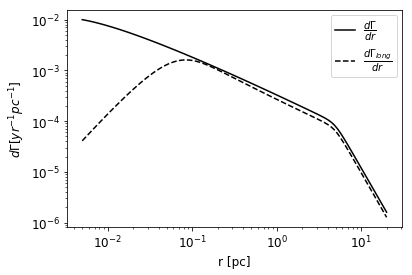

In [8]:
from scipy import integrate
pdf = PdfPages('figure_7.pdf')
dispersion=np.array(dispersion)
def f2(x, vm, vr):
    return (0.5*x*(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
def W(vm, vr): 
    w, err = integrate.quad(f2,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
def f1(x, vm, vr):
    return (x**2*np.sqrt(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
def G(vm, vr): #correspond to eqn (A5)
    w, err = integrate.quad(f1,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
#def f2(x, vm, vr):
    #return (x*(1-(x/vm)**2)*np.exp(-x**2/2)*sp.i0(x*vr)) if (x*vr<20) else 0 #when x*vr<20 f will be negligible, and keeping it will cause sp.i0(x*vr) to overflow (although the exponential factor should reduce it, python still generates instabilities)
#def G2(vm, vr): 
    #w, err = integrate.quad(f2,0,vm, args=(vm,vr)) #a more accurate integration which takes much more time, but the below approximation also works
    #return w*np.exp(-vr**2/2) if  (vm!=0) else 0#at one arcsec
deltat=1.0#the observation time
dGamma=np.zeros(100)
dGammalong=np.zeros(100)

K_0=18
A=np.zeros(49)
#A_k=0.14 #extinction coefficient, already corrected
#ubar=(beta-1)/(2-beta)*(L_l/L_0)**(beta-1) #eqn(23), we didn't use this one
#n=(rho_bd+rho_core)*0.2 #eqn(20),stellar number density 0.2 given on page 143, we use new data to calculate a new one
t=0
for o in range(49):    
    A[o]=max(10**(-0.4*(K_0-M[o])),1.34) #A_s given by eqn(6)
    if (M[o]<K_0):
        t+=fr[o] #fraction of stars directly above threshold
u0= np.sqrt(2*A/(np.sqrt(A**2-1))-2) 
ubar=np.sum(u0*fr*0.25)
Gr=float(0)
Wr=float(0)
vmax=np.zeros((100,49))
a = 0
for i in range(0,100):
    Gs=float(0)
    Ws=float(0)
    dr=x[i]*(1.042-1/1.042) #integration step (approximately) of distance
    for j in range(0,49): #integration over magnitude, bin 1 mag
        vmax[i][j]=2*u0[j]*R_e[i]*0.00001/((86400*365.25)*deltat) if(u0[j]!=0) else 0
        Gs+=G(vmax[i][j]/dispersion[i], v[i]/dispersion[i])*u0[j]*fr[j]*0.25#eqn(A4)
    dGammalong[i]=2*R_e[i]*n_core[i]*dispersion[i]*Gs#*dr
    dGamma[i]=2*R_e[i]*n_core[i]*v[i]*ubar*2.5#*dr #a fudge factor of 2.5
    a+=dr*2*R_e[i]*n_core[i]*dispersion[i]*Gs
plt.plot(x,dGamma*(3.3*10**(-25)), label="$\dfrac{d\Gamma}{dr}$", color="black") #constant given by unit transformation
plt.plot(x,dGammalong*(3.3*10**(-25)), label="$\dfrac{d\Gamma_{long}}{dr}$",ls="--",color="black") 
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("r [pc]",fontsize=12)
plt.ylabel("$d\Gamma [yr^{-1} pc^{-1}]$",fontsize=12)
plt.legend()
pdf.savefig()   
#plt.close()
pdf.close() #produce figure 7
#a*(3.3*10**(-25))

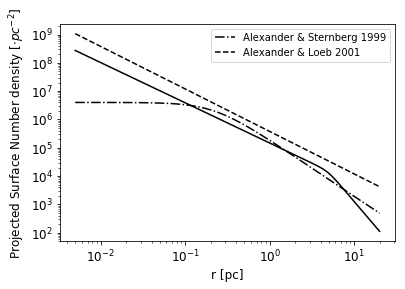

In [13]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from sympy import *
from matplotlib import pyplot as plt
from scipy import special as sp
from scipy import integrate
pdf = PdfPages('figure_9.pdf')
x = np.logspace(np.log10(0.005),np.log10(20),100) #distance to center, from 0.005-20 pc
rb=4.9
gamma_0=1.42
alpha=10
beta=3.5
n=3354
#n_core = n*2**(beta/alpha-gamma_0/alpha)*(x/rb)**(-gamma_0)*(1+(x/rb)**alpha)**(gamma_0/alpha-beta/alpha) nuker model
R_e=x**(1/2)*2.73*10**15 # Einstein Radius in cm
plt.plot(x, n_core*4,color="black")
rho_core = 4.0*10.0**6.0/(1+3*(x/0.38)**2) #eqn (13)
rho_bd =3.53*sp.k0(x/667)+3*np.exp(-x/3001) #eqn (14)
plt.plot(x, rho_core+rho_bd, label='Alexander & Sternberg 1999',ls="-.",color="black") #reproduce fig
epsilon=10**(-7)*3
epsilon2=2.5*10**(-7)
plt.plot(x, 10**6*1.5*(x/0.4)**(-1.5), label='Alexander & Loeb 2001',ls="--",color="black") #reproduce fig
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("r [pc]",fontsize=12) 
plt.ylabel("Projected Surface Number density [$\cdot pc^{-2}$]",fontsize=12)
plt.legend()
pdf.savefig()   
#plt.close()
pdf.close() #figure 9

In [ ]:
from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt
import random
xslice=100
yslice=100
sigmaA=np.zeros((xslice,yslice))
sigmaABH=np.zeros((xslice,yslice))
x_BH=np.linspace(0.76,1.2,101) #unperturbed image distance
A_BH=abs(1-x_BH**(-4))**(-1)
delta=x_BH[1]-x_BH[0]
epsilon = 2.5*10**(-7)
rb=4.9
gamma_0=1.42
alpha=10
beta=3.5
n=3354
it=1000 #Monte Carlo number
r=np.zeros(xslice)
power=np.arange()
z=np.logspace(-1,0,xslice)
def density(t):
    return n*2**(beta/alpha-gamma_0/alpha)*(t/rb)**(-gamma_0)*(1+(t/rb)**alpha)**(gamma_0/alpha-beta/alpha) #nuker model
def sigma_kernel(t,R):
    return density(t)*t/np.sqrt(t**2-R**2)
threshold=np.logspace(np.log10(5),np.log10(100),yslice)
def step_function(x):
    return np.array(x > 0, dtype=np.int)
for o in range(xslice):
    theta =2.02*0.039*z[o]
    normalization=215000*2.5*(theta*epsilon**0.5)**(-0.42)*(theta**2*epsilon*3.14)
    r[o]=normalization
    Sigma=normalization*x_BH**(-0.42)
    for p in range(yslice):
        A_th=threshold[p] #threshold
        sigmaA[o][p]=0.5*A_th**power
    print(o/xslice)
    print(sigmaA[o][0])
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('figure_11.pdf')
plt.imshow(np.log10(sigmaA),extent=[-2,0,np.log10(5),np.log10(100)])
cbar=plt.colorbar()
plt.xlabel("$log(A)$")
plt.ylabel(r"$log(\theta_E/\theta_{\infty})$")
cbar.set_label(r"$log(\sigma_s[\pi\theta_{E}^2])$")
pdf.savefig()
plt.close()
pdf.close() #figure11